# Using the NBA API and linear regression to determine the most and least efficient scorers in the NBA (with at least 500 FGA)

*Michael Black*

**1.** First - I used code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) as a guide to understanding the basics of the NBA API as well as linear regression.

> All code in the below block comes from the link provided above.

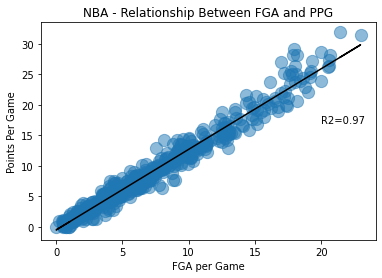

In [112]:
# First we will import our packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     

""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,17, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly
print('')

> To further explain the graph above, it simply shows the correlation between number of shots taken (x-axis) and points scored per game (y-axis).

> As we could guess, the more shots a player takes, the more points they generally will score.

---

**2.** Below, I searched for and graphed the **5 MOST efficient scorers in the NBA**.  Efficiency in this case was determined by how much a certain player came above our line of regression.  To be above our line of regression, a player's **Points scored per game had to be higher than their expected points scored per game** -- aka, efficiency!

> In the block of code below, I calculate a "score" for each player.  The score is simply how much a player outscores (or doesn't outscore) their expected points per game by.

> As I mentioned above, I calculated this score by subtracting a players expected points per game (based on shot attempts) by their actual points scored per game.

> I create a DataFrame with the 10 most efficient scorers.

In [116]:
import heapq
import random

# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were BEST outperforming our line of regression

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 largest PPG - ExPPG in the NBA (most efficient players) and storing
# Them to player_index
player_index = heapq.nlargest(11, range(len(score)), score.take)

# A new list to store information from the original DataFrame
most_efficient = []

# Using our original DataFrame, appending all player information for my 10 most efficient players to my
# 'most_efficient' list
for i in range(len(player_index)):
    most_efficient.append(df.loc[player_index[i]])

# Creating a new DataFrame called 'most_efficient_DF' from my 'most_efficient' list
most_efficient_DF = pd.DataFrame(most_efficient)

# Creating a filter for at least 500 shot attempts
most_efficient_DF = most_efficient_DF[most_efficient_DF['FGA'] > 500]

# Resetting player_index list so that it only contains those with at least 500 shot attempts
player_index = most_efficient_DF.index

> Below, I use the original chunk of code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) again, but I use plt.annotate call in order to draw lines from a certain player's bubble to their name, so that we can see where our five most efficient players land.

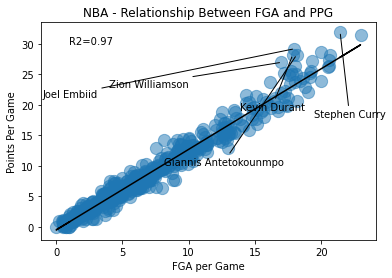

In [103]:
'''
ORIGINAL CODE FROM WEBSITE
---------------------------------------------------------------------------------------------
'''

x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(1,30, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


'''
---------------------------------------------------------------------------------------------
MY CODE BELOW
'''

# In order to point out my 10 most efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index' list with lines drawn to their dots
for i in range(len(player_index) - 5):
    plt.annotate(most_efficient_DF.PLAYER[player_index[i]], 
                 (x[player_index[i]], y[player_index[i]]), 
                 (x[player_index[i]]-random.randint(0,25), y[player_index[i]]-random.randint(0,25)),
                 arrowprops=dict(arrowstyle='-'))

plt.savefig('graph.png', dpi=300)

> I only include the names of the top 5 scorers on the graph for clarity purposes, but have the top 10 in the DataFrame printed below to view.

> Below is a printed DataFrame of the ten most efficient scorers in the NBA, and on the far right you can see exactly how much they outscore their expected points per game.

In [104]:
most_efficient_DF['PPG - ExPPG'] = score[player_index]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

most_efficient_DF

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,PPG - ExPPG
15,203954,16,Joel Embiid,PHI,49,1537,455,881,0.516,57,151,0.377,465,541,0.860,112,414,526,142,47,68,151,116,1432,1562,0.94,0.31,5.955777
70,201142,71,Kevin Durant,BKN,31,1038,299,553,0.541,82,175,0.469,193,219,0.881,12,207,219,161,24,39,110,65,873,926,1.46,0.22,5.078946
5,1629627,6,Zion Williamson,NOP,61,2026,634,1037,0.611,10,34,0.294,369,529,0.698,167,274,441,226,57,39,167,135,1647,1680,1.35,0.34,5.027161
6,203507,7,Giannis Antetokounmpo,MIL,58,1912,595,1052,0.566,65,214,0.304,380,551,0.690,92,543,635,342,68,72,203,161,1635,1921,1.69,0.34,4.711480
0,201939,1,Stephen Curry,GSW,61,2075,635,1307,0.486,327,768,0.426,351,383,0.916,28,307,335,348,75,7,203,115,1948,1806,1.71,0.37,4.106254
57,203497,58,Rudy Gobert,UTA,68,2098,374,554,0.675,0,3,0.000,223,357,0.625,225,681,906,85,38,185,115,158,971,1756,0.74,0.33,4.017878
44,202710,45,Jimmy Butler,MIA,50,1698,356,718,0.496,20,97,0.206,350,406,0.862,92,260,352,362,107,18,107,71,1082,1396,3.38,1.00,3.159543
3,203999,4,Nikola Jokic,DEN,68,2380,695,1228,0.566,92,229,0.402,314,364,0.863,193,544,737,576,93,47,216,183,1796,2450,2.67,0.43,3.038238
48,201935,49,James Harden,BKN,42,1558,334,722,0.463,117,327,0.358,275,316,0.870,35,301,336,457,50,29,173,95,1060,1330,2.64,0.29,3.013281
77,1628983,77,Shai Gilgeous-Alexander,OKC,35,1180,287,565,0.508,71,170,0.418,185,229,0.808,19,147,166,207,27,23,106,70,830,825,1.95,0.26,2.875337


**A couple of notes I found interesting**
- James Harden and KD have a smaller sample size than the others due to injury (also Embiid) but KD's 47% from 3 is terrifying.
- Gobert with such a small number of shots in 68 games on that incredible level of efficiency.
- Giannis shooting 214 three pointers on just 30%.
- Jimmy Butler being such an efficient scorer with absolutely no 3-point threat to his game speaks a ton to his playmaking ability and his ability to get to the free throw line.
- SGA is special.
- Steph: 768 three pointers on 43% - what else is there to say?

---

**3.** Below, I searched for and graphed the **5 LEAST efficient scorers in the NBA (with at least 500 shot attempts)**.  Efficiency in this case was determined by how much a certain player came below our line of regression.  To underperform with our line of regression, a player's **Points scored per game had to be lower than their expected points scored per game** -- aka, not very efficienct!

> In the block of code below, I calculate a "score" for each player.  The score is simply how much a player outscores (or doesn't outscore) their expected points per game.

> I create a DataFrame with the 10 least efficient scorers.

In [117]:
# create an array of values 'score'
# These values were (POINTS PER GAME - EXPECTED POINTS PER GAME)
# In other words, the players who were least outperforming our line of regression while taking 500 shots

score = (y - predicted_y)

# Using heapq to find the indexes of the 10 smallest PPG - ExPPG in the NBA (least efficient players) and storing
# Them to player_index
player_index2 = heapq.nsmallest(20, range(len(score)), score.take)

# A new list to store information from the original DataFrame
least_efficient = []

# Using our original DataFrame, appending all player information for my 10 least efficient players to my
# 'least_efficient' list
for i in range(len(player_index2)):
    least_efficient.append(df.loc[player_index2[i]])

# Creating a new DataFrame called 'least_efficient_DF' from my 'least_effecient' list
least_efficient_DF = pd.DataFrame(least_efficient)

# Creating a filter for at least 500 shot attempts
least_efficient_DF = least_efficient_DF[least_efficient_DF['FGA'] > 500]

# Resetting player_index2 list so that it only contains those with at least 500 shot attempts
player_index2 = least_efficient_DF.index

> Below, I use the original chunk of code from [BetterProgramming](https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8) again, but I use plt.annotate call in order to draw lines from a certain player's bubble to their name, so that we can see where our five least efficient players land.

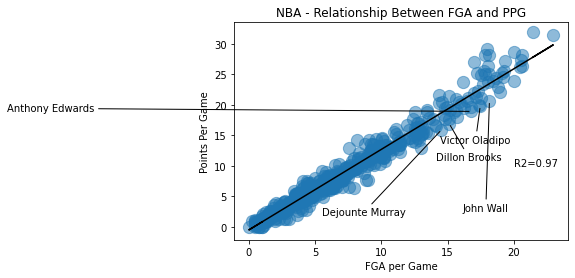

In [109]:
'''
ORIGINAL CODE FROM WEBSITE
---------------------------------------------------------------------------------------------
'''

x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     


# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)   

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=150, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(20,10, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly


'''
---------------------------------------------------------------------------------------------
MY CODE BELOW
'''

# In order to point out my 10 least efficient players on the graph, I used plt.annotate and plugged in the
# indexes from 'player_index2' list with lines drawn to their dots
for i in range(len(player_index2) - 5):
    plt.annotate(least_efficient_DF.PLAYER[player_index2[i]], 
                 (x[player_index2[i]], y[player_index2[i]]), 
                 (x[player_index2[i]]-random.randint(0,35), y[player_index2[i]]-random.randint(0,35)),
                 arrowprops=dict(arrowstyle='-'))


plt.savefig('graph2.png', dpi=300)

> I only include the names of the 5 least efficient scorers (with at least 500 shot attempts) on the graph for clarity purposes, but have the top 10 in the DataFrame printed below to view.

> Below is a printed out DataFrame of the ten least efficient scorers in the NBA (with at least 500 shot attempts), and on the far right you can see exactly how much they fall short of their expected points per game.

In [118]:
least_efficient_DF['ExPPG - PPG'] = score[player_index2]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

least_efficient_DF

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,ExPPG - PPG
79,202322,79,John Wall,HOU,40,1288,293,726,0.404,79,249,0.317,158,211,0.749,17,112,129,275,42,31,141,46,823,673,1.95,0.30,-2.920052
135,203506,136,Victor Oladipo,MIA,33,1080,235,576,0.408,78,239,0.326,104,138,0.754,12,148,160,151,46,14,83,81,652,565,1.82,0.55,-2.817429
51,1627749,52,Dejounte Murray,SAS,64,2043,424,929,0.456,63,194,0.325,105,131,0.802,55,391,446,347,96,6,115,133,1016,1265,3.02,0.84,-2.811981
23,1630162,24,Anthony Edwards,MIN,69,2203,479,1156,0.414,161,493,0.327,191,249,0.767,58,267,325,196,79,32,156,124,1310,1051,1.26,0.51,-2.662218
45,1628415,46,Dillon Brooks,MEM,64,1897,404,968,0.417,122,352,0.347,151,184,0.821,50,136,186,146,74,22,116,227,1081,796,1.26,0.64,-2.602524
20,201566,21,Russell Westbrook,WAS,62,2249,519,1177,0.441,79,251,0.315,250,385,0.649,105,613,718,721,82,23,304,181,1367,1814,2.37,0.27,-2.549828
68,1627747,69,Caris LeVert,IND,44,1385,336,763,0.440,79,238,0.332,132,166,0.795,32,169,201,222,60,29,90,98,883,844,2.47,0.67,-2.356489
139,203901,140,Elfrid Payton,NYK,59,1432,267,608,0.439,28,97,0.289,73,107,0.682,64,144,208,197,46,9,99,107,635,621,1.99,0.47,-2.353965
156,1626224,157,Cedi Osman,CLE,57,1451,210,566,0.371,96,314,0.306,76,95,0.800,37,156,193,165,52,9,73,112,592,563,2.26,0.71,-2.234264
36,203903,37,Jordan Clarkson,UTA,65,1730,428,1020,0.420,195,569,0.343,120,134,0.896,45,220,265,159,58,10,110,103,1171,947,1.45,0.53,-2.228281


**A couple of notes I found interesting**
- John Wall and Victor Oladipo both fit the role of "ex-star trying to prove that he is still a star" and that could be a factor leading to them feeling as though they should attempt more shots than they really should.
- Dejounte Murray and Russell Westbrook both shoot well from the floor but attempt way too many 3-pointers for their abilities.
- Anthony Edwards has taken so many shots.
- Jordan Clarkson rounding out the top 10... leading candidate for 6-man of the year?
- LeVert and Oladipo were essentially traded for each other, with each team thinking they got the better player.  Maybe nobody won that one?

---

# Thank you for reading!